<a href="https://colab.research.google.com/github/Sankalpa0011/CNN-Plant-Disease-Prediction-Streamlit/blob/main/CNN_Classification_Plant_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Seeding For Reproducibility**

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

## **Import Libraries**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from keras.models import Sequential

## **Data Curation**

In [4]:
!pip install kaggle

In [5]:
kaggle_credentails = json.load(open("/content/drive/MyDrive/DL Projects/kaggle (1).json"))

In [6]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!ls

 drive	'plantvillage dataset'	 plantvillage-dataset.zip   sample_data


In [9]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [10]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'grayscale', 'color']
38
['Peach___Bacterial_spot', 'Grape___Esca_(Black_Measles)', 'Pepper,_bell___healthy', 'Tomato___Early_blight', 'Strawberry___healthy']
38
['Peach___Bacterial_spot', 'Grape___Esca_(Black_Measles)', 'Pepper,_bell___healthy', 'Tomato___Early_blight', 'Strawberry___healthy']
38
['Peach___Bacterial_spot', 'Grape___Esca_(Black_Measles)', 'Pepper,_bell___healthy', 'Tomato___Early_blight', 'Strawberry___healthy']


In [11]:
print(len(os.listdir("plantvillage dataset/color/Apple___healthy")))
print(len(os.listdir("plantvillage dataset/color/Apple___healthy")[:5]))

1645
5


## **Data Preprocessing**

In [12]:
# Dataset path
base_dir = "plantvillage dataset/color"

(256, 256, 3)


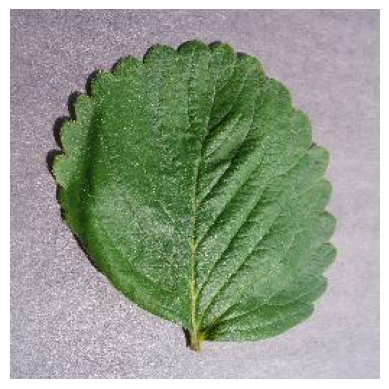

In [13]:
image_path = os.path.join("/content/plantvillage dataset/color/Strawberry___healthy/00166615-5e7b-4318-8957-5e50df335ee8___RS_HL 1785.JPG")

img = mpimg.imread(image_path)

print(img.shape)

plt.imshow(img)
plt.axis("off")
plt.show()

In [14]:
# Image parameters
img_size = 224
batch_size = 32

## **Train Test Split**

## **Data Augmentation**

In [15]:
# Image data generator
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

In [16]:
# Train generator
train_gen = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset="training",
    class_mode="categorical"
)

Found 43456 images belonging to 38 classes.


In [17]:
# Validation generator
val_gen = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical"
)

Found 10849 images belonging to 38 classes.


## **Convolution Neural Network**

In [18]:
# Model
model = Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_gen.num_classes, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dropout (Dropout)           (None, 186624)            0

In [19]:
# Train the model
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,
    epochs=25,
    validation_data=val_gen,
    validation_steps=val_gen.samples // batch_size
)

Epoch 1/25
1358/1358 [==============================] - 147s 98ms/step - loss: 2.3419 - accuracy: 0.3852 - val_loss: 1.2203 - val_accuracy: 0.6635
Epoch 2/25
1358/1358 [==============================] - 126s 92ms/step - loss: 1.4125 - accuracy: 0.6005 - val_loss: 0.8174 - val_accuracy: 0.7608
Epoch 3/25
1358/1358 [==============================] - 123s 90ms/step - loss: 1.0664 - accuracy: 0.6906 - val_loss: 0.6441 - val_accuracy: 0.8184
Epoch 4/25
1358/1358 [==============================] - 123s 91ms/step - loss: 0.8721 - accuracy: 0.7409 - val_loss: 0.5506 - val_accuracy: 0.8343
Epoch 5/25
1358/1358 [==============================] - 124s 91ms/step - loss: 0.7661 - accuracy: 0.7731 - val_loss: 0.5021 - val_accuracy: 0.8458
Epoch 6/25
1358/1358 [==============================] - 122s 90ms/step - loss: 0.6783 - accuracy: 0.7995 - val_loss: 0.4690 - val_accuracy: 0.8591
Epoch 7/25
1358/1358 [==============================] - 122s 90ms/step - loss: 0.6179 - accuracy: 0.8160 - val_loss: 0

## **Model Evaluation**

In [20]:
val_loss, val_accuracy = model.evaluate(val_gen, steps=val_gen.samples // batch_size)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

339/339 [==============================] - 19s 55ms/step - loss: 0.4106 - accuracy: 0.8956
Validation Loss: 0.4106442630290985
Validation Accuracy: 0.8955568075180054


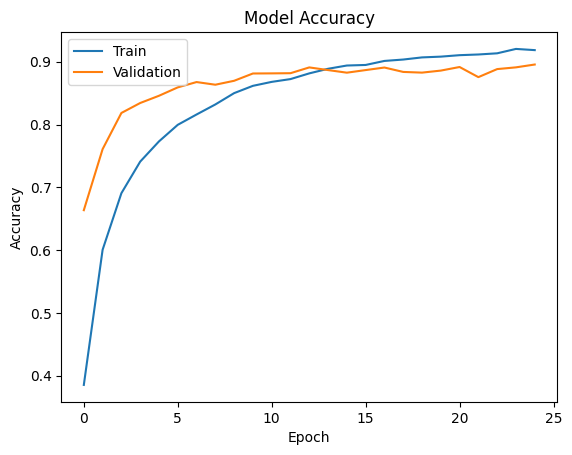

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

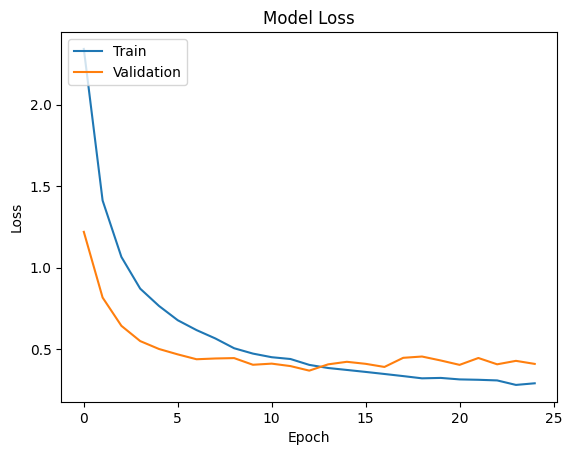

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show

## **Predictive System**

In [23]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

In [24]:
# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [25]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_gen.class_indices.items()}

In [26]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [27]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

1/1 [==============================] - 0s 493ms/step
Predicted Class Index: 13
Predicted Class Name: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Actual Class Name: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


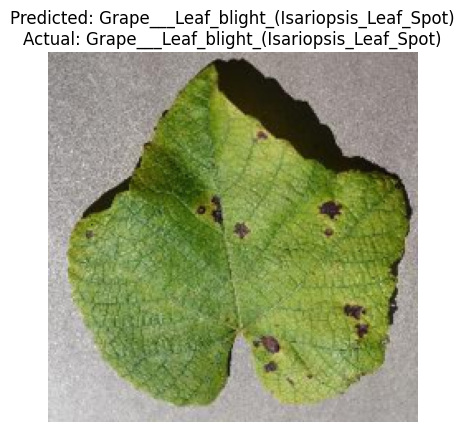

In [28]:
#image_path = '/content/plantvillage dataset/color/Blueberry___healthy/00fee259-67b7-4dd7-8b36-12503bbdba14___RS_HL 2681.JPG'
#image_path = '/content/plantvillage dataset/color/Grape___Esca_(Black_Measles)/0075b632-2e34-4e4f-9697-fe2b332b7ef8___FAM_B.Msls 4399.JPG'
#image_path = '/content/plantvillage dataset/color/Cherry_(including_sour)___Powdery_mildew/00705aa7-5ea2-4419-9440-8ba65e108eb9___FREC_Pwd.M 0267.JPG'
#image_path = '/content/plantvillage dataset/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG'
#image_path = '/content/apple_black_rot.jpg'
image_path = '/content/plantvillage dataset/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/0001aa74-bbd7-433b-a900-1dccab39d521___FAM_L.Blight 4508.JPG'


def predict_image_class(model, image_path, class_indices):
    # Load and preprocess the image before prediction
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img) # Pass the preprocessed image to the model
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]

    # Extract the actual class name from the image path
    actual_class_name = None
    for key, value in class_indices.items():
        if value in image_path:
            actual_class_name = value
            break

    return predicted_class_index, predicted_class_name, actual_class_name, preprocessed_img

predicted_class_index, predicted_class_name, actual_class_name, preprocessed_img = predict_image_class(model, image_path, class_indices) # Capture preprocessed_img

print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Name:", predicted_class_name)
print("Actual Class Name:", actual_class_name)

# Visualize the prediction similar to batch processing example
plt.imshow(preprocessed_img[0])
plt.axis("off")
plt.title(f"Predicted: {predicted_class_name}\nActual: {actual_class_name}")
plt.show()


## **Save the model to Google drive or local**

In [29]:
model.save('/content/drive/MyDrive/DL Projects/CNN Plant Disease Classification/plant_disease_prediction_new_model.h5', include_optimizer=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
model.save('plant_disease_prediction_new_model.h5', include_optimizer=True)